# More examples for clustering

### Helper functions

In [1]:
import numpy as np

def load_labeled_data(filename):
    X = []
    y = []
    with open(filename) as fp:
        for line in fp:
            temp = line.split()
            X.append(temp[:-1])
            y.append(temp[-1])
    return np.array(X, dtype = float), np.array(y, dtype = float)

def load_unlabeled_data(filename):
    X = []
    with open(filename) as fp:
        for line in fp:
            X.append(line.split())
    return np.array(X, dtype = float)

In [2]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

def plot_unlabeled(X):
    fig = plt.figure(figsize = (10,10))
    plt.scatter(X[:,0], X[:,1],s=10)
    plt.show()
    return

def plot_labeled(X,y):
    fig = plt.figure(figsize = (10,10))
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_3D_unlabeled(X):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')
    plt.show()
    return

def plot_3D_labeled(X,y):    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')

    
    cmap = plt.get_cmap('PiYG')
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], X[y == cl, 2],
                   cmap=cmap, label=cl)
    plt.legend()
    plt.show()
    return

def plot_MNIST(X):    
    plt.imshow(X.reshape(28, 28))
    plt.show()
    return

### Datasets provided to you
* data/labeled_Aggregation.txt
* data/labeled_Compound.txt
* data/labeled_D31.txt
* data/labeled_Spiral.txt
* data/unlabeled_ConfLongDemo.txt
* data/unlabeled_Unbalanced.txt


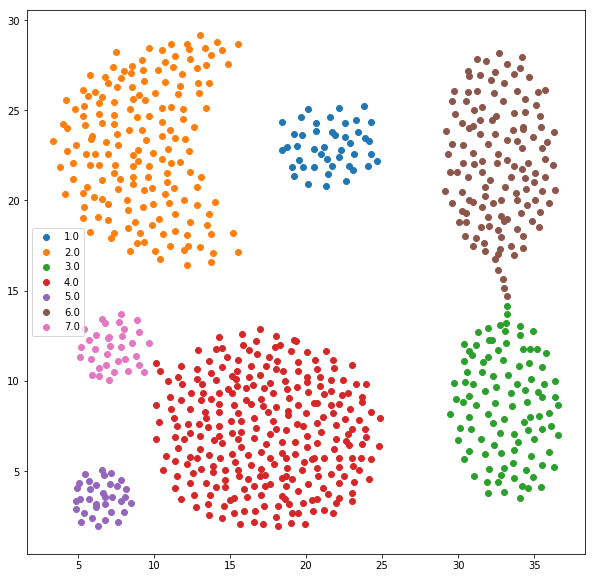

In [3]:
# Load data
X,y = load_labeled_data("data/labeled_Aggregation.txt")
plot_labeled(X,y)

#X = load_unlabled_data("data/labeled_Aggregation.txt")

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MeanShift
from sklearn.cluster import DBSCAN

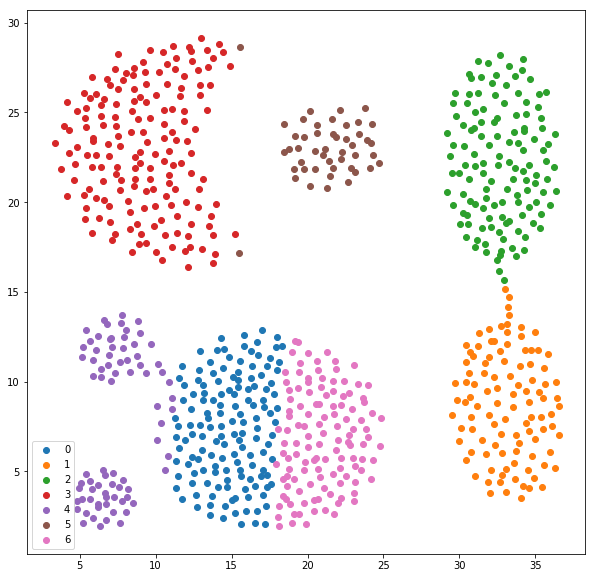

In [7]:
# k-means with 7 clusters
#difference between classification and clustering: it doesn't make sense for a clustering method to predict.
#the data in clustering isn't labled (a key difference).  One is SUPERVISED, one is not.

model = KMeans(n_clusters = 7)
model.fit(X)
labels = model.predict(X)
plot_labeled(X, labels)

#running this again won't give the same result, because the centers are initialized every time.

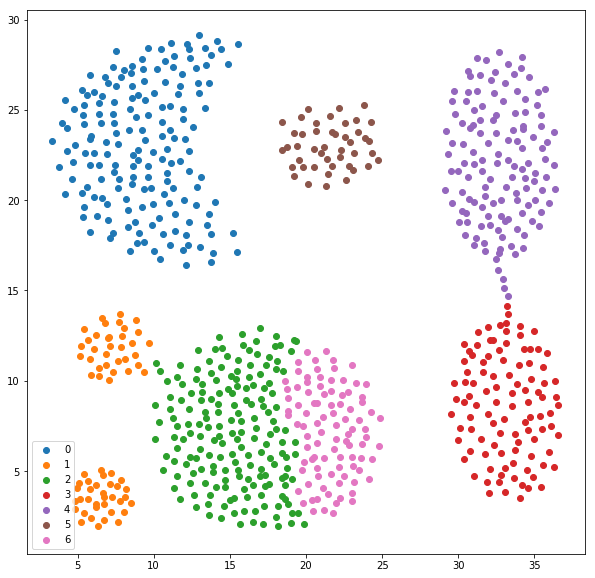

In [9]:
# Agglomerative Clustering
#This is a periodical clustering method.  Start with many small clusters, and then combine small clusters together.
model = AgglomerativeClustering(n_clusters = 7)
model.fit(X)
#labels = model.predict(X)  #doesn't have attribute predict()! Here is a difference in this method with the previous.
labels = model.labels_
plot_labeled(X, labels)

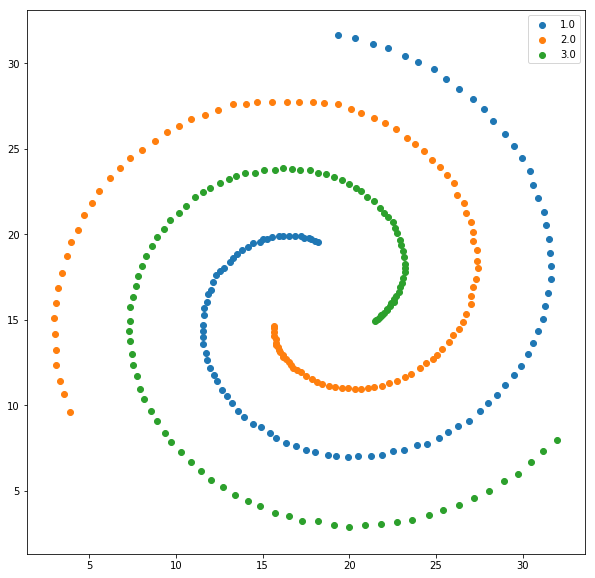

In [10]:
# Different dataset
X,y = load_labeled_data("data/labeled_Spiral.txt")
plot_labeled(X,y)

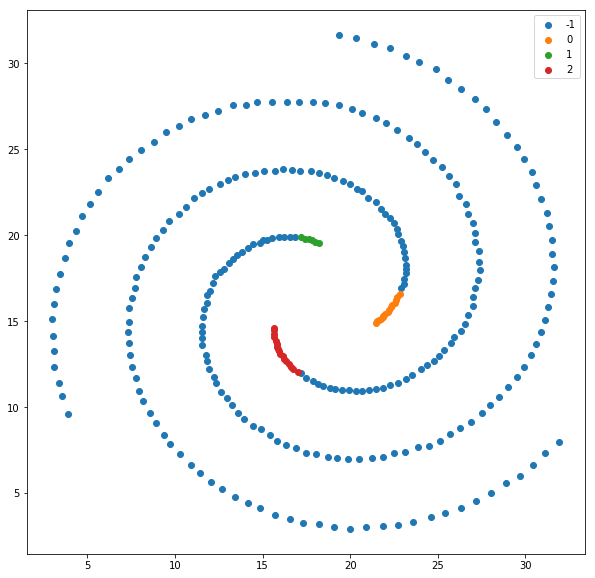

In [13]:
# DBSCAN want to use this to cluster the above data because the data has a dense path we want to cluster it by,
#not a dense blob.  However, we see that this doesn't look good, which highlights the importance of understanding 
#your tools, settings, and data set.  See next attempt.

model = DBSCAN()
model.fit(X)
labels = model.labels_
plot_labeled(X, labels)


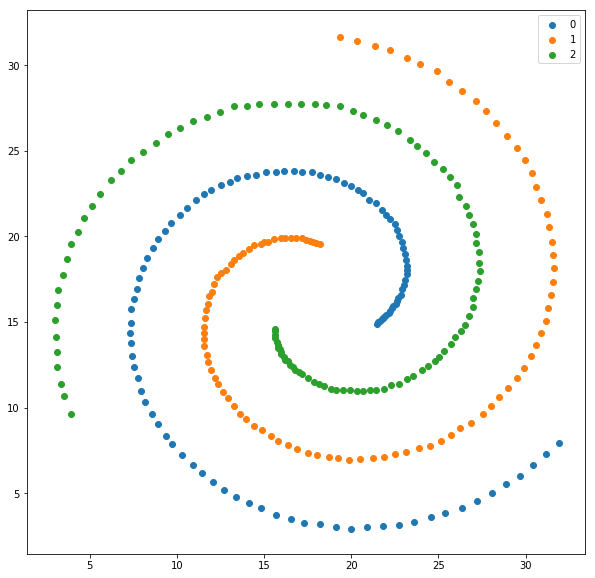

In [14]:
# tuning DBSCAN hyper parameters
model = DBSCAN(min_samples = 1, eps = 3)
model.fit(X)
labels = model.labels_
plot_labeled(X,labels)

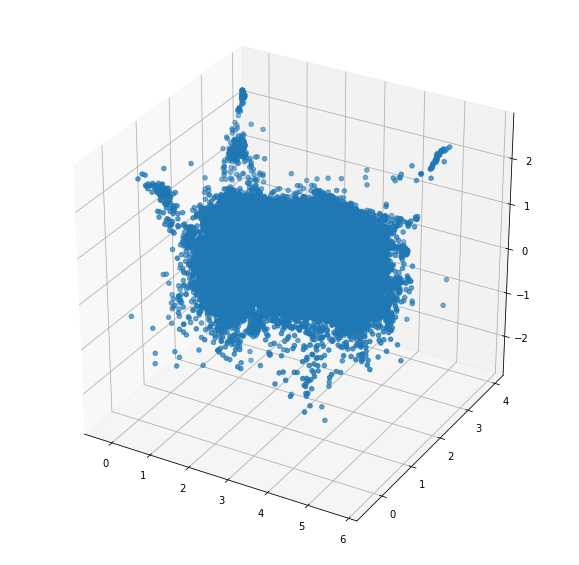

In [18]:
# 3D dataset
X = load_unlabeled_data("data/unlabeled_ConfLongDemo.txt")
plot_3D_unlabeled(X)

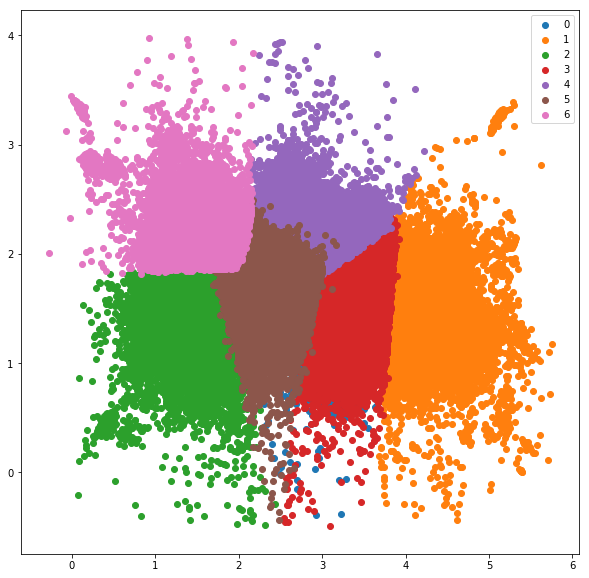

In [19]:
# clustering with k-means
model = KMeans(n_clusters = 7)
model.fit(X)
labels = model.predict(X)
plot_labeled(X, labels)

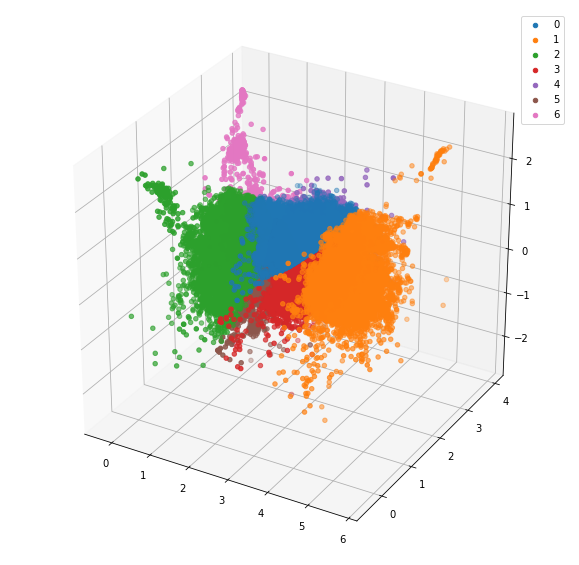

In [21]:
plot_3D_labeled(X, labels)

# Short introduction to dimension reduction


Dimension reduction: reducing the dimension of the feature space for analysis or visualization

* Feature Elimination: reduce the feature space by eliminating features
* Feature Extraction: create “new” features, where each “new” feature is a combination of each of “old” features in a specific way. We keep as many of the new features as we want, and drop the “least important ones.”

### Principal Component Analysis

![](images/PCA_illustration.png)

Tutorial: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

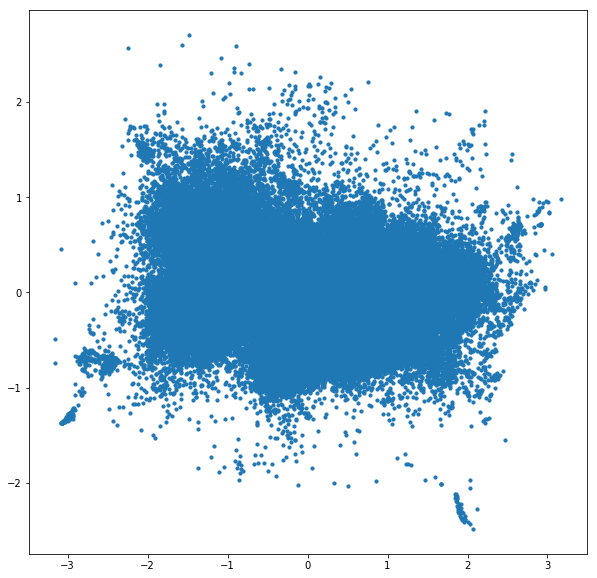

In [29]:
# PCA example with the 3D dataset
#Not trying to predict any values: trying to transform feautures (X)
#This reduces our 3D data set into a 2D data set.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
standscaler = StandardScaler()
standscaler.fit(X)
X_scaled = standscaler.transform(X)


model = PCA(n_components = 2)

model.fit(X)
X_transformed = model.transform(X)
plot_unlabeled(X_transformed)

In [26]:
print(model.explained_variance_ratio_)

[0.72403206 0.15801337]


In [27]:
print(model.components_)

[[ 0.97420437 -0.22535701  0.01183497]
 [-0.22079511 -0.9626975  -0.15640667]]


### MNIST Dataset

Dataset of handwritten digits. Each datapoint is a 28 * 28 image
![](images/MNIST.png)

In [30]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")
X = mnist.train.images[:5000]
y = mnist.train.labels[:5000]

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [31]:
X.shape

(5000, 784)

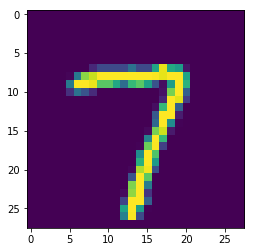

In [36]:
plot_MNIST(X[100])

In [ ]:
# MNIST with PCA (50 components)
from sklearn.decomposition import PCA
model = PCA(n_components = 50)
model.fit(X)
X_transformed = model.transform(X)
plot.labled(X_transformed, y)


In [ ]:
print(model.explained_variance_ratio_)
print(sum(model.explained_variance_ratio_[:30]))

## Other methods
* https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd
* https://colah.github.io/posts/2014-10-Visualizing-MNIST/   READ THIS

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2, n_neighbors = 5)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.376s...
[t-SNE] Computed neighbors for 5000 samples in 35.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.234141
[t-SNE] Computed conditional probabilities in 0.209s
[t-SNE] Iteration 50: error = 88.8872299, gradient norm = 0.0081136 (50 iterations in 4.531s)
[t-SNE] Iteration 100: error = 82.7668381, gradient norm = 0.0063818 (50 iterations in 5.169s)
[t-SNE] Iteration 150: error = 82.2173309, gradient norm = 0.0027645 (50 iterations in 3.291s)
[t-SNE] Iteration 200: error = 82.0932770, gradient norm = 0.0010799 (50 iterations in 2.930s)
[t-SNE] Iteration 250: error = 82.0771713, gradient norm = 0.000427

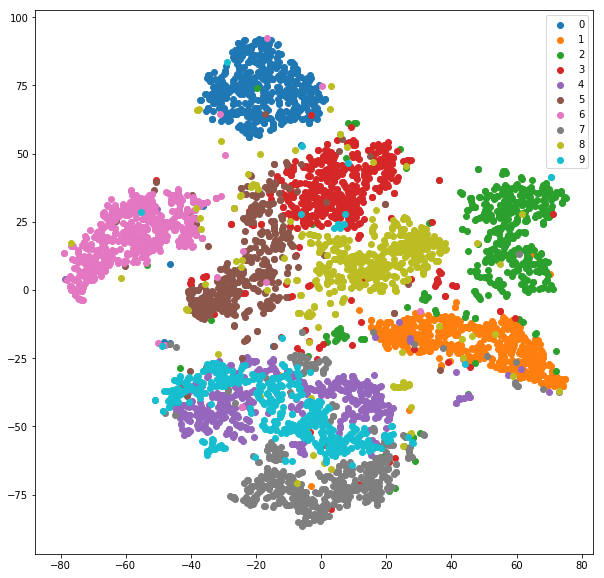

In [21]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2,learning_rate=300,perplexity = 30, verbose = 3)
X_transformed = model.fit_transform(X)
plot_labeled(X_transformed,y)

# Q&A Session